# Aqui analisaremos a semelhança entre meia esfera e esfera

In [4]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
from scipy.special import spherical_jn, spherical_yn , hankel1,lpmv
import cmath

# Primeiro vamos fazer figura das esferas

In [3]:
def mask_esp(X,R,n,z):
  n=n+2
  U,L=[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in z:
    j=0
    for h in L:
      if (round(h,1)==round(i,1)):
        j+=1
        k=h
        break
    if j ==0:
      U.append(np.ones(len(X)))
    else:
      U.append((X**2>=R**2 - (k - R)**2).astype(int) )
  return U,L

def mask_Mesp(X,R,n,z):
  n=n+2
  U,L=[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in z:
    j=0
    for h in L:
      if (round(h,1)==round(i,1)) and (round(h,1) <= R):
        j+=1
        k=h
        break
    if j ==0:
      U.append(np.ones(len(X)))
    else:
      U.append((X**2>=R**2 - (k - R)**2).astype(int) )
  return U,L

def mask_Mesp2(X,R,n,z):
  n=n+2
  U,L=[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in z:
    j=0
    for h in L:
      if (round(h,1)==round(i,1)) and (round(h,1) >= R):
        j+=1
        k=h
        break
    if j ==0:
      U.append(np.ones(len(X)))
    else:
      U.append((X**2>=R**2 - (k - R)**2).astype(int) )
  return U,L

[0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875 7.5
 8.125 8.75  9.375]
[0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875 7.5
 8.125 8.75  9.375]
[0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875 7.5
 8.125 8.75  9.375]


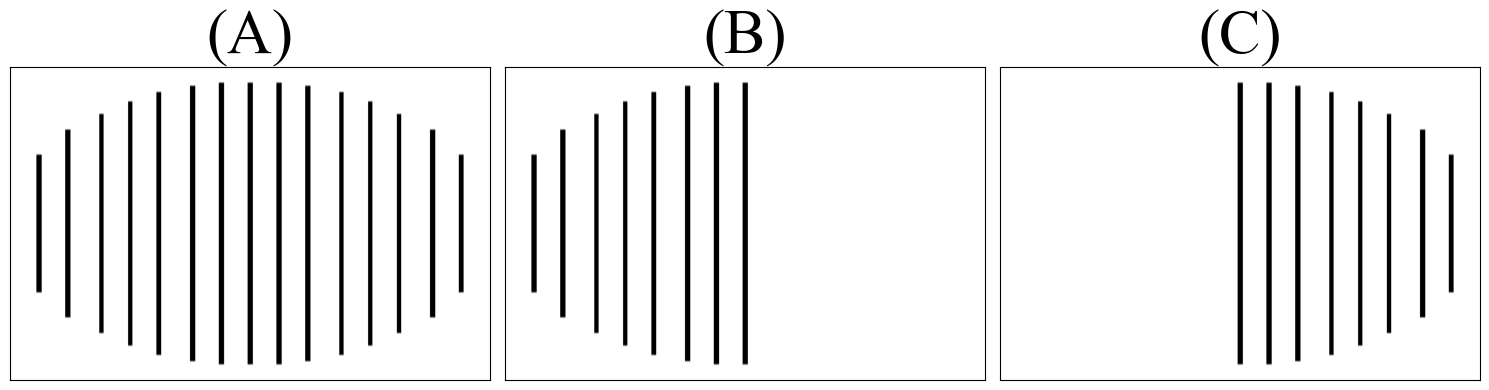

In [4]:
X =np.linspace(-5.5,5.5,100)
R=5
z=np.arange(0,10,0.01)

n=15
fig,ax=plt.subplots(1,3,figsize=(15,4))
U1,L1=mask_esp(X,R,n,z)
print(L1)
ax[0].imshow(np.transpose(U1),aspect='auto',cmap='gray')
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_title('(A)',fontname='Times New Roman', fontsize=45)

U2,L2=mask_Mesp(X,R,n,z)
print(L2)
ax[1].imshow(np.transpose(U2),aspect='auto',cmap='gray')
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_title('(B)',fontname='Times New Roman', fontsize=45)

U3,L3=mask_Mesp2(X,R,n,z)
print(L3)
ax[2].imshow(np.transpose(U3),aspect='auto',cmap='gray')
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_title('(C)',fontname='Times New Roman', fontsize=45)

plt.tight_layout()
plt.savefig('Esferas_2D.png',dpi=300)

# Agora vamos pro espectro

In [2]:
def Optica(U0,X,Y,z,lamb):
    A = fft2(U0)
    
    kx = 2*np.pi*fftfreq(len(X[0]),
                 abs(X[0][0]-X[0][1]))
    
    Kx,Ky = np.meshgrid(kx,kx)
    K = 2*np.pi/lamb
    
    A1 = A*np.exp(1j*z*np.sqrt(K**2-Kx**2-Ky**2))
    return ifft2(A1)
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

def mask_esp(X,Y,R,n):
  n=n+2
  U0,L =[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in L:
    U0.append( (X**2+Y**2>R**2 - (i - R)**2).astype(int))

  return U0,np.ones(n-3)*L[0]

def mask_Mesp(X,Y,R,n):
  n=n+2
  U0,L =[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in L[:len(L)//2+1]:
    U0.append( (X**2+Y**2>R**2 - (i - R)**2).astype(int))

  return U0,np.ones((n-3)//2+1)*L[0]

def mask_Mesp2(X,Y,R,n):
  n=n+2
  U0,L =[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in L[len(L)//2:]:
    U0.append( (X**2+Y**2>R**2 - (i - R)**2).astype(int))

  return U0,np.ones((n-3)//2+1)*L[0]

def Optica_G(U0,X,Y,lamb,L,z):
    A= 1
    for i in range(len(L)):
      A =  Optica(A*U0[i],X,Y,L[i],lamb)

    return Optica(A*U0[-1],X,Y,z,lamb)

In [6]:
def MieCoef(x, M, n):
    # Computing spherical Bessel functions for n and M*n
    j_n_x = spherical_jn(n, x)
    j_n_Mx = spherical_jn(n, M*x)

    # Computing Riccati-Bessel functions
    psi_n_x = x * j_n_x
    zeta_n_x = x * cmath.sqrt(np.pi/(2*x))*hankel1(n+1/2,x)

    psi_n_Mx = M * x * j_n_Mx
    zeta_n_Mx = M * x * cmath.sqrt(np.pi/(2*M*x))*hankel1(n+1/2,M*x)

    # Computing Riccati-Bessel function derivatives using numdifftools
    #psi_n_x_prime = nd.Derivative(lambda x: x * spherical_jn(n, x), n=1, order=1)(x)
    psi_n_x_prime = 1/2* (  x* (spherical_jn(n-1,x)-spherical_jn(n+1,x)) + spherical_jn(n,x) ) 
    
    zeta_n_x_prime = 1/2* cmath.sqrt(np.pi/(2*x))*(  x* (hankel1(n+1/2-1,x)-hankel1(n+1/2+1,x)) + hankel1(n+1/2,x) )

    #psi_n_Mx_prime = nd.Derivative(lambda x: M * x * spherical_jn(n, M * x), n=1, order=1)(x)
    psi_n_Mx_prime = 1/2* (  M*x* (spherical_jn(n-1,M*x)-spherical_jn(n+1,M*x)) + spherical_jn(n,M*x) ) 
    
    zeta_n_Mx_prime= 1/2* cmath.sqrt(np.pi/(2*M*x))*(  x* (hankel1(n+1/2-1,M*x)-hankel1(n+1/2+1,M*x)) + hankel1(n+1/2,M*x) )

    # Calculating coefficients a_n, b_n, c_n, d_n
    a_n = (M * psi_n_Mx * psi_n_x_prime - psi_n_Mx_prime * psi_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
    b_n = (M * psi_n_Mx_prime * psi_n_x - psi_n_Mx * psi_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)
    
    #c_n = (psi_n_x * zeta_n_x_prime - psi_n_x_prime * zeta_n_x) / (psi_n_Mx_prime * zeta_n_x - M * psi_n_Mx * zeta_n_x_prime)
    #d_n = (psi_n_x_prime * zeta_n_x - psi_n_x * zeta_n_x_prime) / (psi_n_Mx * zeta_n_x_prime - M * psi_n_Mx_prime * zeta_n_x)

    return a_n, b_n

def MieCoefCond2(x, n, k1):
    jn = spherical_jn(n, x)
    jn1 = spherical_jn(n+1,x)
    jn_1 = spherical_jn(n-1,x)
    
    hankeln = np.sqrt(np.pi/(2*x))*hankel1(n+1/2,x)
    hankeln1 = np.sqrt(np.pi/(2*x))*hankel1(n+1+1/2,x)
    hankeln_1 = np.sqrt(np.pi/(2*x))*hankel1(n-1+1/2,x)
    
    a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))

    b = - jn/hankeln  

    
    return a, b


def E1_SCATnm(n, a_n, b_n, k, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
    theta = np.arccos(z / r)

    kr = k * r
    hn = np.sqrt(np.pi / (2 * kr)) * hankel1(n + 1 / 2, kr)
    hn1 = np.sqrt(np.pi / (2 * kr)) * hankel1(n + 1 / 2 + 1, kr)
    Pn1 = lpmv(1, n + 1, np.cos(theta))
    Pn = lpmv(1, n, np.cos(theta))

    dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
    P = Pn / np.sin(theta)

    # Replace zero values of dP and P at theta=0 with -1/2*n*(n+1)

    zero_theta_indices = (np.where(abs(theta) < 10**(-10))[0])
    dP[zero_theta_indices] = -0.5 * n * (n + 1)
    P[zero_theta_indices] = -0.5 * n * (n + 1)

    zero_theta_indices = (np.isnan(phi))
    phi[zero_theta_indices] = 0
    
    Gn = 1j**n
    prefac = -Gn / (n * (n + 1)) * (2 * n + 1) * 1j

    term_r = -a_n / kr * hn * Pn * n * (n + 1) * np.cos(phi)
    term_the = (-a_n / kr * ((n + 1) * hn - kr * hn1) * dP - 1j * b_n * hn * P) * np.cos(phi)
    term_phi = (a_n / kr * ((n + 1) * hn - kr * hn1) * P + 1j * b_n * hn * dP) * np.sin(phi)

    return prefac * (np.array([term_r * np.cos(phi) * np.sin(theta), term_r * np.sin(theta) * np.sin(phi), term_r * np.cos(theta)]) +
                     np.array([term_the * np.cos(phi) * np.cos(theta), term_the * np.cos(theta) * np.sin(phi), -term_the * np.sin(theta)]) +
                     np.array([-term_phi * np.sin(phi), term_phi * np.cos(phi), np.zeros_like(r)]))

def EZ0_SCATnm(n, a_n, b_n, k, x, y, z):
    r = np.sqrt(x**2+y**2+z**2)
    phi = np.pi/2
    theta = 0
    kr = k*r

    hn = np.sqrt(np.pi/(2*kr))*hankel1(n+1/2,kr)
    hn1 = np.sqrt(np.pi/(2*kr))*hankel1(n+1/2+1,kr)

    Gn = 1j**(n) 
    prefac = Gn/2 *(2*n+1)*1j

    term_the = (-a_n/kr* ( (n+1)*hn - kr*hn1 ) -1j* b_n * hn )*np.cos(phi)
    
    term_phi = (a_n/kr* ( (n+1)*hn - kr*hn1 ) +1j* b_n * hn)* np.sin(phi)
    
    term_r = np.zeros_like(term_the) 

    return prefac* ( np.array([term_r*np.cos(phi)*np.sin(theta),term_r*np.sin(theta)*np.sin(phi),term_r*np.cos(theta)]) + 
     np.array([term_the*np.cos(phi)*np.cos(theta) ,term_the*np.cos(theta)*np.sin(phi), - term_the*np.sin(theta)]) + 
     np.array([-term_phi *np.sin(phi) , term_phi*np.cos(phi) , term_phi *0 ]) )


In [7]:
def FiguraOptica(U0,X,Y,lamb,L,z):
  A= 1
  Z=[]
  #A =  Optica(A,X,Y,L[0],lamb)
  for i in range(len(L)):
    A =  Optica(A*U0[i],X,Y,L[i],lamb)

  for i in range(len(z)):
    U = Optica(A*U0[-1],X,Y,z[i],lamb)
    Z.append(abs(U[len(A[0])//2])**2)
  return Z

In [8]:
R1= 100#1*u.mm

lamb = 632*10**(-3)#633*u.nm

z= np.linspace(0,100*R1,30)#100*u.mm
N = 7000

x0 = np.linspace(-9*R1,9*R1,N,endpoint=False)#*u.mm

X,Y = np.meshgrid(x0,x0)

n= 3
A,L = mask_esp(X,Y,R1,n)
Z0 = FiguraOptica(A,X,Y,lamb,L,z+L[0])

AM,LM = mask_Mesp(X,Y,R1,n)
Z0M = FiguraOptica(AM,X,Y,lamb,LM,z+R1)

AM2,LM2 = mask_Mesp2(X,Y,R1,n)
Z0M2 = FiguraOptica(AM,X,Y,lamb,LM2,z+LM2[0])


In [9]:
def FiguraOptica2(U0,X,Y,lamb,z):
  Z=[]
  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    Z.append(abs(U[len(A[0])//2])**2)
  return Z

Z = FiguraOptica2( (X**2+Y**2>R1**2).astype('float32'),X,Y,lamb,z+R1 )

In [10]:
N0= 98000
k = 2*np.pi/lamb
x_value = k * R1
M=1.48

x = 0
y = 0
z3 = z+R1
E3z_sca=0

for i in range(1,N0):    
    a_nm,b_nm = MieCoefCond2(x_value, i, k)
    #a_nm,b_nm = MieCoef(x_value, M,i)
    if np.isnan(np.abs(a_nm)) or np.isnan(np.abs(a_nm)):
        print(i)
        break

    E3z_sca += EZ0_SCATnm(i, a_nm, b_nm, k, x, y, z3)


1833


C:\Users\user\AppData\Local\Temp\ipykernel_10512\1986730255.py:42: RuntimeWarning: invalid value encountered in scalar divide
  a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))


Text(0.5, 0, 'z (mm)')

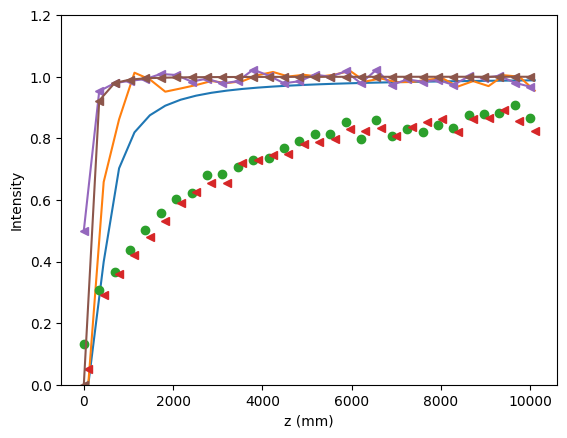

In [11]:
Z00 = abs(E3z_sca[0] + np.exp(1j*k*z3) )**2 + abs(E3z_sca[1])**2 + abs(E3z_sca[2])**2

plt.plot(z3,Z00,'-')

plt.plot(z3,np.transpose(Z0)[N//2],'-')
plt.plot(z,np.transpose(Z0M)[N//2],'o')
plt.plot(z3,np.transpose(Z0M2)[N//2],'<')


plt.plot(z,np.transpose(Z)[N//2],'<-')
plt.plot(z,z**2/(z**2+R1**2),'<-')

plt.ylim(0,1.2)
#plt.xscale('log')

plt.ylabel('Intensity')
plt.xlabel('z (mm)')


C:\Users\user\AppData\Local\Temp\ipykernel_10512\1986730255.py:61: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_10512\1986730255.py:62: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


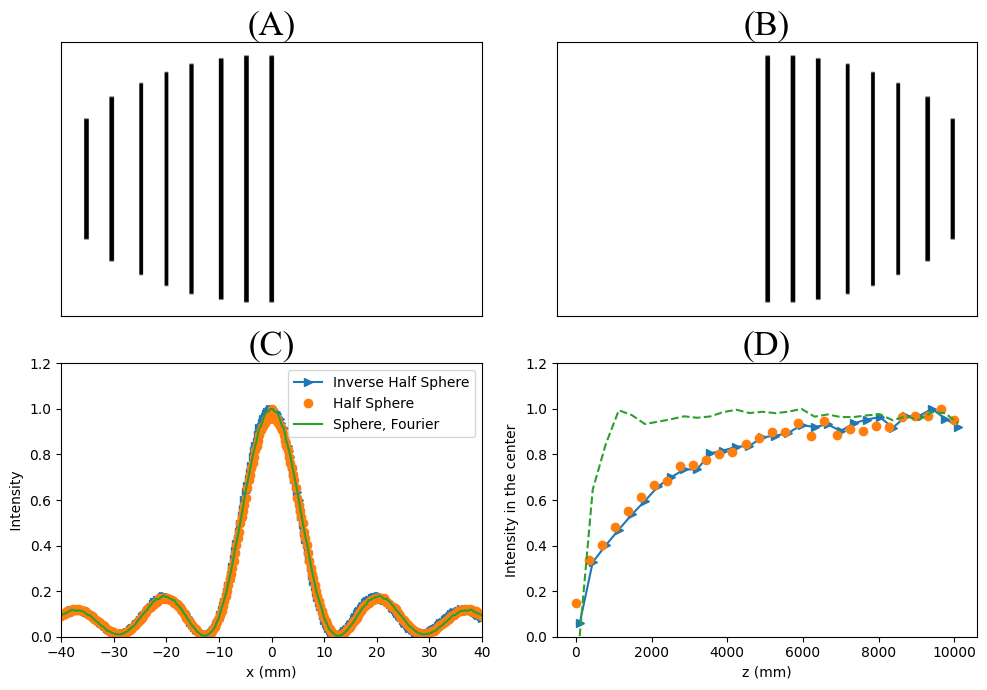

In [13]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(2, 2, figure=fig)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])


ax1.imshow(np.transpose(U2),aspect='auto',cmap='gray')
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_title('(A)',fontname='Times New Roman', fontsize=25)


ax2.imshow(np.transpose(U3),aspect='auto',cmap='gray')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title('(B)',fontname='Times New Roman', fontsize=25)

b=15
ax3.plot(x0,Z0M2[b]/max(Z0M2[b][np.where( abs(x0)<=50 )[0]]),'>-',label='Inverse Half Sphere')
ax3.plot(x0,Z0M[b]/max(Z0M[b][np.where( abs(x0)<=50 )[0]]),'o',label='Half Sphere')
ax3.plot(x0,Z0[b]/ max(Z0[b][np.where( abs(x0)<=50 )[0] ]),'-',label='Sphere, Fourier')



x = x0[np.where( abs(x0)<=50 )[0] ]
y = 0
zz = z3[b]
E3_sca=0
N0=i
for i in range(1,N0):    
    a_nm,b_nm = MieCoefCond2(x_value, i, k)
    #a_nm,b_nm = MieCoef(x_value, M,i)

    E3_sca += E1_SCATnm(i, a_nm, b_nm, k, x, y, zz)


U0 = abs(E3_sca[0]+np.exp(1j*k*zz))**2 + abs(E3_sca[1])**2 + abs(E3_sca[2])**2
#ax3.plot(x,U0/max(U0),'-',label='Sphere, Mie')

ax3.set_xlim([-40,40])
ax3.set_ylim(0,1.2)
ax3.legend( )

#ax[1].set_yscale('log')
ax3.set_xlabel('x (mm)')
ax3.set_ylabel(' Intensity ')
ax3.set_title('(C)',fontname='Times New Roman', fontsize=25)



ax4.plot(z3,np.transpose(Z0M2)[N//2] / np.max(np.transpose(Z0M2)[N//2] ),'>-',label='Inverse Half Sphere')
ax4.plot(z,np.transpose(Z0M)[N//2]/ np.max(np.transpose(Z0M)[N//2] ),'o',label='Half Sphere')
ax4.plot(z3,np.transpose(Z0)[N//2]/ np.max(np.transpose(Z0)[N//2] ),'--',label='Sphere, Fourier')
#ax4.plot(z3,Z00,'-',label='Sphere, Mie')


ax4.set_ylim(0,1.2)
#ax4.set_xscale('log')
ax4.set_ylabel('Intensity in the center')
ax4.set_xlabel('z (mm)')
ax4.set_title('(D)',fontname='Times New Roman', fontsize=25)

plt.tight_layout()

plt.savefig('ComparaMESF-3masks.png',dpi=300)

# Podemos tentar fazer um cone

In [59]:
def mask_cone(X,Y,h,R,n):
    U0,L = [],np.arange(1,n+1,1)*h/n
    for i in range(n):
        U0.append( (X**2+Y**2> (R/h*L[i] )**2) )
    return U0,np.ones(n-1)*h/n


In [60]:
R1 = 5#1*u.mm
h = 10
lamb = 632*10**(-6)#633*u.nm

z= np.linspace(0,2000,100)#100*u.mm
N = 4000

x0 = np.linspace(-5*R1,5*R1,N,endpoint=False)#*u.mm


X,Y = np.meshgrid(x0,x0)


N = len(x0)
n= 13

AC,LC = mask_cone(X,Y,h,R1,n)
Z0C = FiguraOptica(AC,X,Y,lamb,LC,z)

AC2,LC2 = AC[::-1],LC
Z0C2 = FiguraOptica(AC2,X,Y,lamb,LC2,z-R1+L[0])


Text(0.5, 0, 'z (mm)')

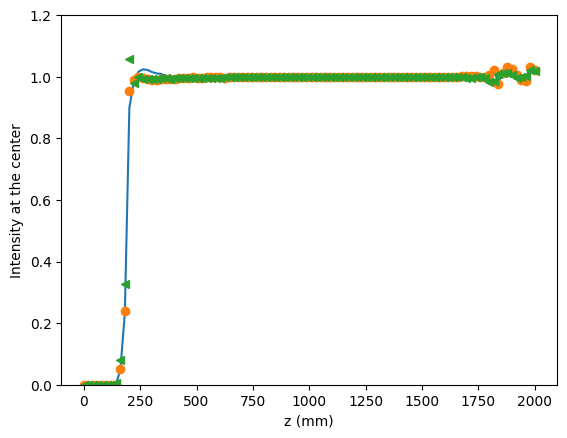

In [61]:

plt.plot(z,np.transpose(Z0)[N//2],'-')
plt.plot(z,np.transpose(Z0C)[N//2],'o')
plt.plot(z,np.transpose(Z0C2)[N//2],'<')

plt.ylim(0,1.2)
#plt.xscale('log')

plt.ylabel('Intensity at the center')
plt.xlabel('z (mm)')


In [62]:
U11 = []
zz = np.arange(0,10.3,0.1)
ll = np.arange(1,n+1,1)*h/n

for i in range(len(zz)):
    u=0
    for j in range(len(ll)):
        if round(zz[i],1) == round(ll[j],1):
            U11.append(AC[j][N//2])
            u+=1
            break
    if u==0:
        U11.append(np.ones((N)))

U22 = []
for i in range(len(zz)):
    u=0
    for j in range(len(ll)):
        if round(zz[i],1) == round(ll[j],1):
            U22.append(AC2[j][N//2])
            u+=1
            break
    if u==0:
        U22.append(np.ones((N)))

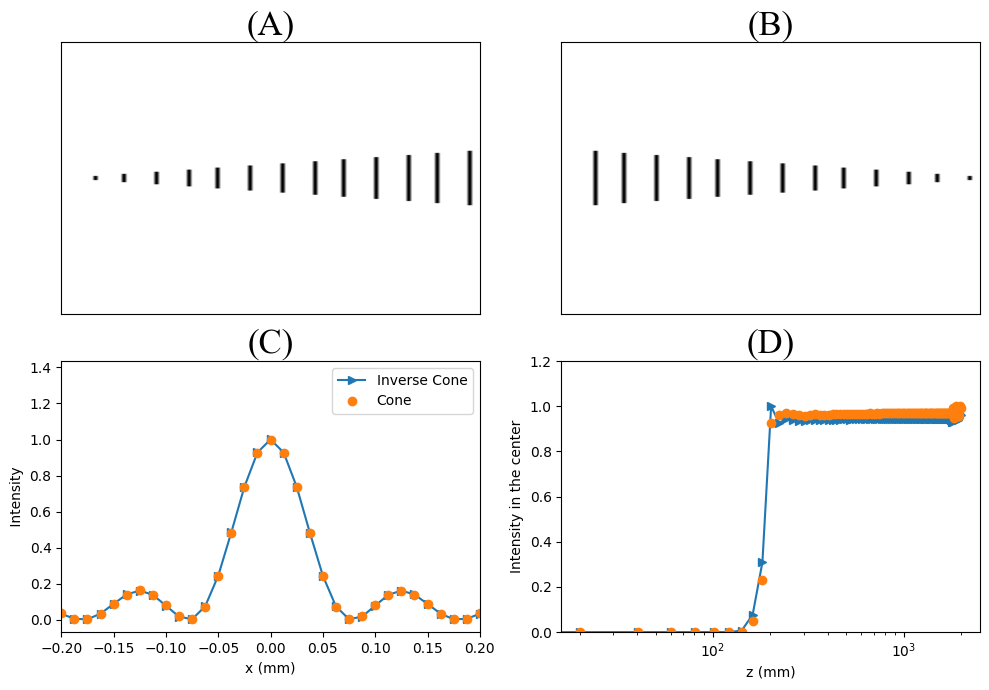

In [63]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(2, 2, figure=fig)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])


ax1.imshow(np.transpose(U11),aspect='auto',cmap='gray')
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_title('(A)',fontname='Times New Roman', fontsize=25)


ax2.imshow(np.transpose(U22),aspect='auto',cmap='gray')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title('(B)',fontname='Times New Roman', fontsize=25)

ax3.plot(x0,Z0C2[80],'>-',label='Inverse Cone')
ax3.plot(x0,Z0C[80],'o',label='Cone')
#ax3.plot(x0,UU0,'o',label='Half Sphere')
#ax3.plot(x0,UU,'-',label='Sphere')
ax3.set_xlim([-0.2,0.2])
#ax3.set_ylim(0,0.5)
ax3.legend( )

#ax[1].set_yscale('log')
ax3.set_xlabel('x (mm)')
ax3.set_ylabel(' Intensity ')
ax3.set_title('(C)',fontname='Times New Roman', fontsize=25)


z= np.linspace(0,2000,100)#100*u.mm

#ax4.plot(z,np.transpose(Z0)[N//2] /max(np.transpose(Z0)[N//2] ) ,'-', label='Sphere')
ax4.plot(z,np.transpose(Z0C2)[N//2] / max(np.transpose(Z0C2)[N//2] ),'>-',label='Inverse Cone')
ax4.plot(z,np.transpose(Z0C)[N//2]/ max(np.transpose(Z0C)[N//2] ),'o',label='Cone')


ax4.set_ylim(0,1.2)
ax4.set_xscale('log')
ax4.set_ylabel('Intensity in the center')
ax4.set_xlabel('z (mm)')
ax4.set_title('(D)',fontname='Times New Roman', fontsize=25)

plt.tight_layout()

plt.savefig('ComparaCONES.png',dpi=300)

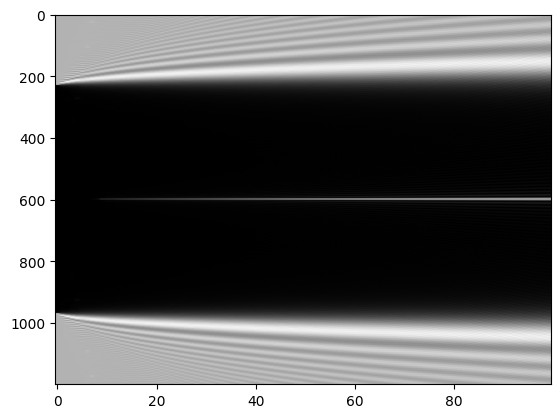

In [58]:
plt.imshow(np.transpose(Z0C)[np.where(abs(x0)<1.5*R1)[0]], aspect='auto', cmap = 'gray')

# Agora vamos de configurações de mascaras

In [5]:
def mascs(caminho_img,N):
    # Abre a imagem em preto e branco
    img = Image.open(caminho_img).convert('L')

    #Redimensionar Imagem
    img_ = img.resize((N,N),Image.LANCZOS)

    # Converte a imagem para um array NumPy
    matriz = np.array(img_)

    # Converte a matriz, onde pixels pretos têm valor 0 e pixels brancos têm valor 1
    matriz_masc = (matriz != 0).astype(int)

    return matriz_masc

def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(abs(X))
    Ly= np.max(abs(Y))

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    #kx = ( fftfreq( len(X[0]), abs(X[0][0]-X[0][1])))
    #ky = ( fftfreq(len(Y[0]), abs(Y[1][0]-Y[0][0])))
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

def Optica_G(U0,X,Y,lamb,L,z):
    A= 1
    for i in range(len(L)):
      A =  Optica(A*U0[i],X,Y,L[i],lamb)

    return Optica(A*U0[-1],X,Y,z,lamb)

In [3]:
def FiguraOptica2(U0,X,Y,lamb,z):
  Z=[]
  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    Z.append(abs(U[len(U0)//2])**2)
  return Z

def FiguraOptica(U0,X,Y,lamb,L,z):
  A= U0[0]
  Z=[]
  #A =  Optica(A,X,Y,L[0],lamb)
  for i in range(len(L)):
    A =  Optica(A*U0[i],X,Y,L[i],lamb)

  for i in range(len(z)):
    U = Optica(A*U0[-1],X,Y,z[i],lamb)
    Z.append(abs(U[len(U[0])//2])**2)
  return Z

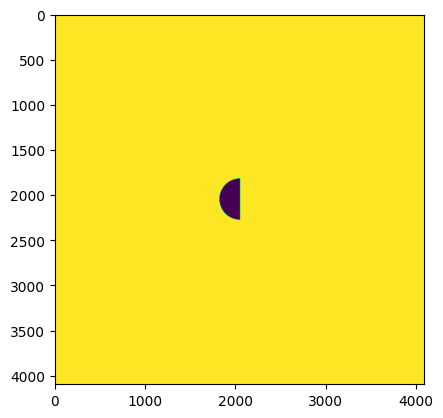

In [4]:
N = 4096
R,r = 8,3
x = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)

A0 = (X**2+Y**2>R**2).astype('float32')
A1 = ((X**2+Y**2>R**2)+(X<0) ).astype('float32')
A2 = ((X**2+Y**2>R**2)+(X>0) ).astype('float32')


plt.imshow(A2)

In [5]:
L = np.array([0.5])
A = np.array([A1,A2])
z = 1200
lamb = 0.632*10**(-3)

UN = Optica_G(A,X,Y,lamb,L,z)
U0 = Optica(A2*A1,X,Y,z+L[0],lamb)

L = np.array([10])
UN2 = Optica_G(A,X,Y,lamb,L,z)
U02 = Optica(A2*A1,X,Y,z+L[0],lamb)

L = np.array([50])
UN3 = Optica_G(A,X,Y,lamb,L,z)
U03 = Optica(A2*A1,X,Y,z+L[0],lamb)

L = np.array([200])
UN4 = Optica_G(A,X,Y,lamb,L,z)
U04 = Optica(A2*A1,X,Y,z+L[0],lamb)


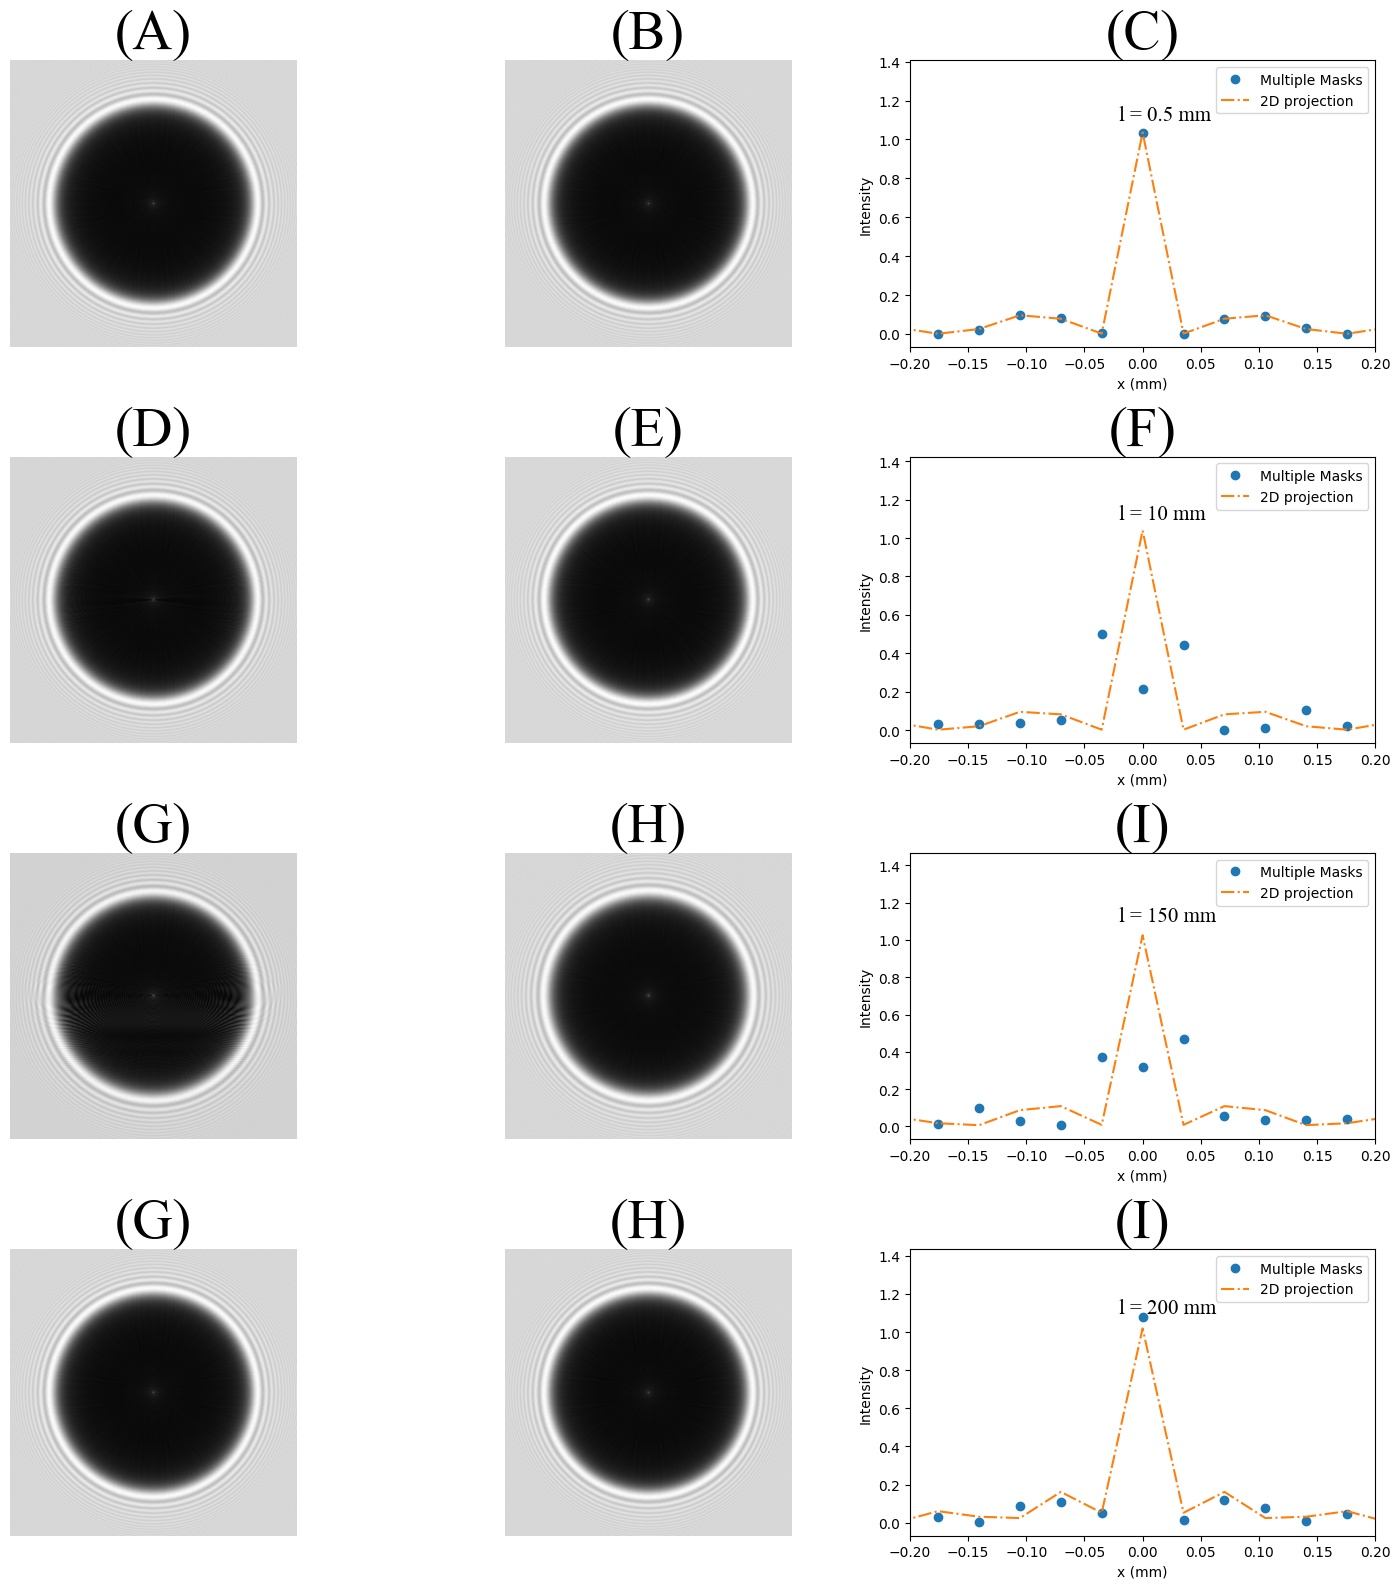

: 

In [7]:
fig = plt.figure(figsize=(15,16))
gs = gridspec.GridSpec(4,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(abs(np.transpose(UN[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax1.axis('off')
ax1.set_title('(A)',fontname='Times New Roman', fontsize=40)

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(abs(np.transpose(U0[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax2.axis('off')
ax2.set_title('(B)',fontname='Times New Roman', fontsize=40)


ax3 = fig.add_subplot(gs[0,2])
UUN = abs(UN[N//2])**2
UU0 = abs(U0[N//2])**2

ax3.plot(x,UUN,'o',label='Multiple Masks')
ax3.plot(x,UU0,'-.',label='2D projection')
ax3.annotate(f'l = {round(0.5,2)} mm',xy = (0,0),xytext= (-0.02,1.1), fontname='Times New Roman', fontsize=15   )
ax3.set_ylabel('Intensity')
ax3.set_xlabel('x (mm)')
ax3.set_xlim(-0.2,0.2)
ax3.legend()
ax3.set_title('(C)',fontname='Times New Roman', fontsize=40)

#-----------------
ax1 = fig.add_subplot(gs[1,0])
ax1.imshow(abs(np.transpose(UN2[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax1.axis('off')
ax1.set_title('(D)',fontname='Times New Roman', fontsize=40)

ax2 = fig.add_subplot(gs[1,1])
ax2.imshow(abs(np.transpose(U02[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax2.axis('off')
ax2.set_title('(E)',fontname='Times New Roman', fontsize=40)


ax3 = fig.add_subplot(gs[1,2])
UUN = abs(UN2[N//2])**2
UU0 = abs(U02[N//2])**2

ax3.plot(x,UUN,'o',label='Multiple Masks')
ax3.plot(x,UU0,'-.',label='2D projection')
ax3.annotate(f'l = {round(10,2)} mm',xy = (0,0),xytext= (-0.02,1.1), fontname='Times New Roman', fontsize=15   )
ax3.set_ylabel('Intensity')
ax3.set_xlabel('x (mm)')
ax3.set_xlim(-0.2,0.2)
ax3.legend()
ax3.set_title('(F)',fontname='Times New Roman', fontsize=40)

#---------

ax1 = fig.add_subplot(gs[2,0])
ax1.imshow(abs(np.transpose(UN4[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax1.axis('off')
ax1.set_title('(G)',fontname='Times New Roman', fontsize=40)

ax2 = fig.add_subplot(gs[2,1])
ax2.imshow(abs(np.transpose(U04[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax2.axis('off')
ax2.set_title('(H)',fontname='Times New Roman', fontsize=40)


ax3 = fig.add_subplot(gs[2,2])
UUN = abs(UN3[N//2])**2
UU0 = abs(U03[N//2])**2

ax3.plot(x,UUN,'o',label='Multiple Masks')
ax3.plot(x,UU0,'-.',label='2D projection')
ax3.annotate(f'l = {round(150,2)} mm',xy = (0,0),xytext= (-0.02,1.1), fontname='Times New Roman', fontsize=15   )
ax3.set_ylabel('Intensity')
ax3.set_xlabel('x (mm)')
ax3.set_xlim(-0.2,0.2)
ax3.legend()
ax3.set_title('(I)',fontname='Times New Roman', fontsize=40)

#--------
ax1 = fig.add_subplot(gs[3,0])
ax1.imshow(abs(np.transpose(UN[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax1.axis('off')
ax1.set_title('(G)',fontname='Times New Roman', fontsize=40)

ax2 = fig.add_subplot(gs[3,1])
ax2.imshow(abs(np.transpose(U0[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]]),cmap='gray')
ax2.axis('off')
ax2.set_title('(H)',fontname='Times New Roman', fontsize=40)


ax3 = fig.add_subplot(gs[3,2])
UUN = abs(UN4[N//2])**2
UU0 = abs(U04[N//2])**2

ax3.plot(x,UUN,'o',label='Multiple Masks')
ax3.plot(x,UU0,'-.',label='2D projection')
ax3.annotate(f'l = {round(200,2)} mm',xy = (0,0),xytext= (-0.02,1.1), fontname='Times New Roman', fontsize=15   )
ax3.set_ylabel('Intensity')
ax3.set_xlabel('x (mm)')
ax3.set_xlim(-0.2,0.2)
ax3.legend()
ax3.set_title('(I)',fontname='Times New Roman', fontsize=40)

plt.tight_layout()

plt.savefig('Half-Cir.svg',dpi=300)

**Analisando a distancia**

In [44]:
def FiguraOptica(U0,X,Y,lamb,L,z):
  A= U0[0]
  Z=[]
  #A =  Optica(A,X,Y,L[0],lamb)
  for i in range(len(L)):
    A =  Optica(A*U0[i],X,Y,L[i],lamb)

  for i in range(len(z)):
    U = Optica(A*U0[-1],X,Y,z[i],lamb)
    Z.append(abs( U[len(U)//2])**2)
  return Z

In [49]:
N = 4096
R,r = 8,3
x = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)

A0 = (X**2+Y**2>R**2).astype('float32')
A1 = ((X**2+Y**2>R**2)+(X<0) ).astype('float32')
A2 = ((X**2+Y**2>R**2)+(X>0) ).astype('float32')

In [61]:
z = np.array([60*R,120*R,240*R,300*R,360*R,420*R,800*R,2100*R])
lamb = 0.632*10**(-3)
L = np.array([50])

A = [A1,A2]

ZN01 = FiguraOptica(A,X,Y,lamb,L,z )
ZZN01 = FiguraOptica2(A0,X,Y,lamb,z+np.sum(L) )

ZN2 = FiguraOptica(A,X,Y,lamb,L/L[0]*150,z)
ZZN2 = FiguraOptica2(A0,X,Y,lamb,z+np.sum(L/L[0]*200) )

ZN3 = FiguraOptica(A,X,Y,lamb,L/L[0]*500,z)
ZZ3 = FiguraOptica2(A0,X,Y,lamb,z+np.sum(L/L[0]*500)  )
#UN = Optica_G(A,X,Y,lamb,L,z-L[0]*len(L))
#U0 = Optica(A0,X,Y,z,lamb)

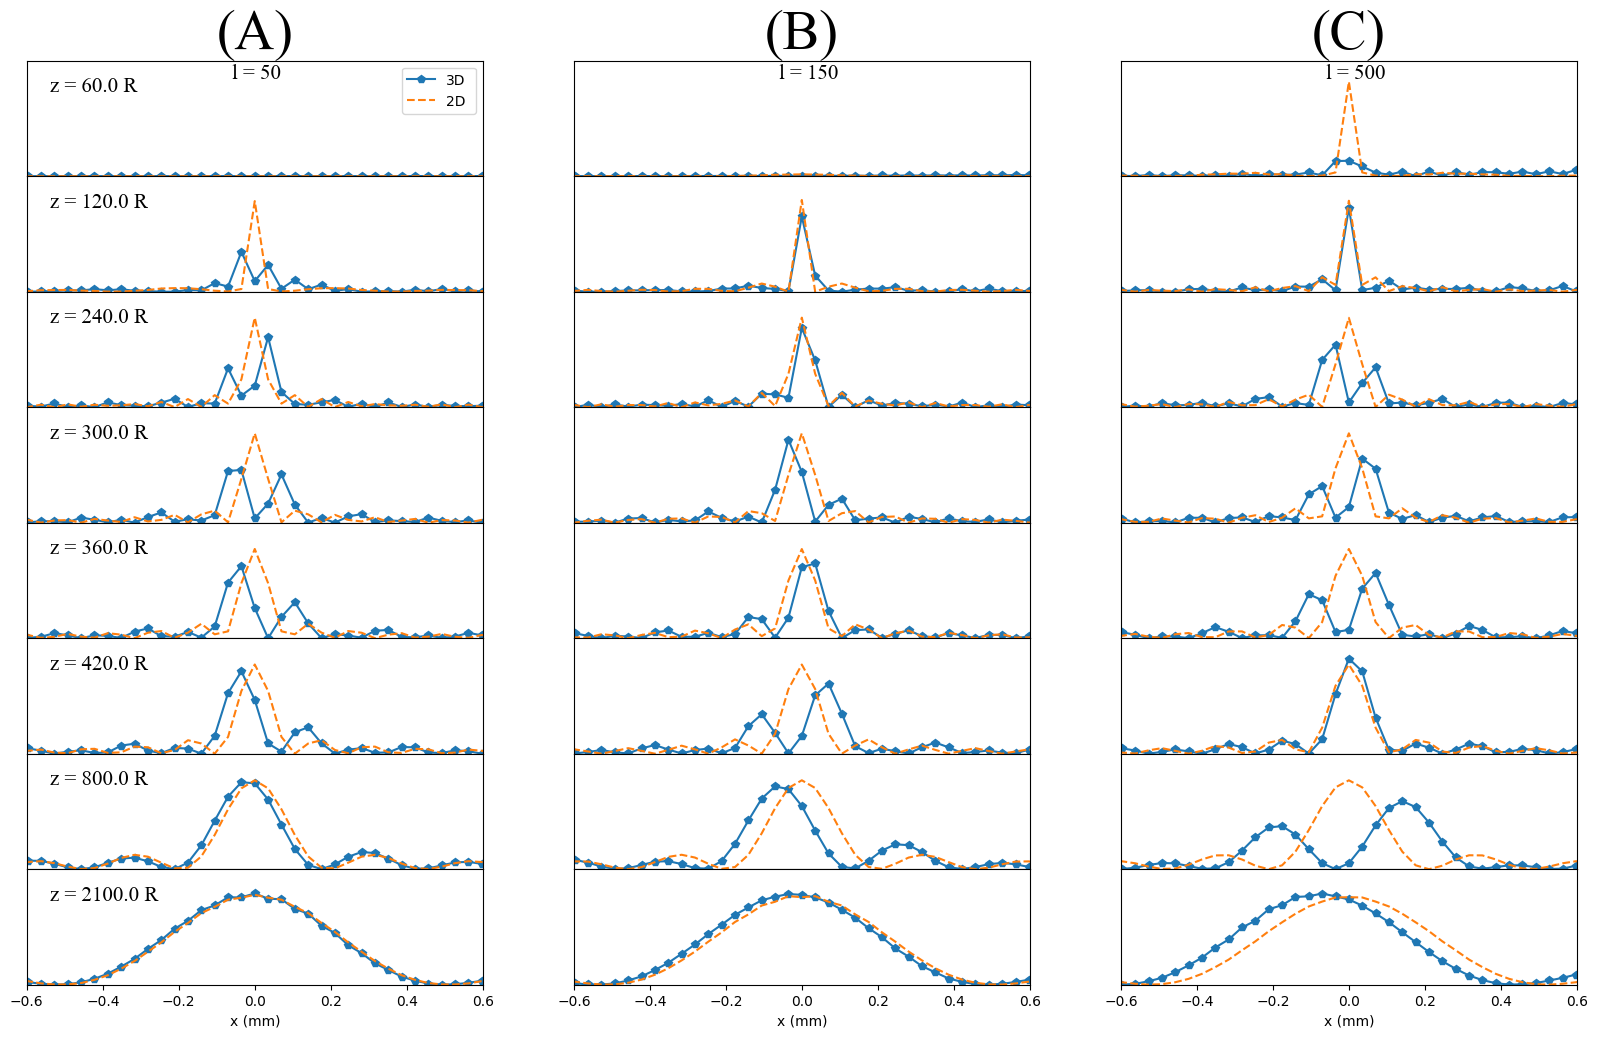

In [62]:
import matplotlib.gridspec as gridspec
b = [0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6]
# Create the figure and grid specification
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(len(z),3, hspace=0.0)
l=[50,150,500]
llet = ['A','B','C']
# Create subplots in the first column
for j in range(3):
    
    for u in range(len(z)):
        ax1 = fig.add_subplot(gs[u, j])

        # Plot Fourier Optics data
        if j==0:
            UU15 = ZN01[u]
            UUU = ZZN01[u]
        if j==1:
            UU15 = ZN2[u]
            UUU = ZZN2[u]
        if j==2:
            UU15 = ZN3[u]
            UUU = ZZ3[u]
        

        ax1.plot(x, UU15, 'p-', label=f'3D')
        ax1.plot(x,UUU ,'--',label='2D '  )

        ax1.set_xlim(-b[u], b[u])  # Ensure consistent x-axis limits
        #ax1.set_ylabel('Intensity')
        ax1.set_ylim(0,1.3)
        ax1.set_yticks([])
        if j==0:
            ax1.annotate(f'z = {round(z[u]/R,2)} R',xy = (0,0),xytext= (-b[u]/10*9,0.95), fontname='Times New Roman', fontsize=15   )
        if u == 0:
            ax1.set_title(f'({llet[j]})',fontname='Times New Roman',fontsize=40)
            ax1.annotate(f'l = {round(l[j],2)} mm',xy = (0,0),xytext= (-b[u]/10,1.1), fontname='Times New Roman', fontsize=15   )
            if j==0:
                ax1.legend()
        if u < len(z)-1:
            ax1.set_xticks([])
            ax1.xaxis.set_visible(False)
            ax1.xaxis.set_ticks_position('none')
        if u==len(z)-1:
            ax1.set_xlabel('x (mm)')


plt.savefig('Compara-HalfCircles.png',dpi=300)